# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [2]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

In [3]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

In [4]:
C_data = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data = np.load(data_path+"/AvgDmatrixSCZ.npy")

In [5]:
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

In [6]:
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

In [7]:
FC_data = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries = np.load(data_path+"/AvgTmatrixSCZ.npy")

In [8]:
FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

In [9]:
#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.55
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05

#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.95
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05
total_gbc_model = []
total_scores_model = []
i_list = []

input = np.linspace(0, 5, 50) 

for i in range(len(input)): 
    wc = WCModel(Cmat = Cmat, Dmat = Dmat)
    wc.params['duration'] = 40*1000
    print(i)
    print(input[i])
    wc.params['exc_ext'] = 0.45
    wc.params['c_excinh'] = 10.33
    wc.params['c_inhexc'] = 9.67
    wc.params['c_inhinh'] = input[i]
    wc.params['K_gl'] = 1.84
    wc.params['sigma_ou'] = 4.28e-05
    wc.run(bold = True)
    gbc_model = np.mean(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]))
    total_gbc_model.append(gbc_model)
    print(gbc_model)
    scores = [func.matrix_correlation(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]), FCs)]
    total_scores_model.append(np.mean(scores))
    i_list.append(i)

0
0.0
0.6110798021057731
1
0.10204081632653061
0.5844751119550621
2
0.20408163265306123
0.7255344179600083
3
0.30612244897959184
0.6853401896691438
4
0.40816326530612246
0.5118583285284583
5
0.5102040816326531
0.5299937528023606
6
0.6122448979591837
0.3648297153268759
7
0.7142857142857143
0.29284847681148
8
0.8163265306122449
0.5039645607695147
9
0.9183673469387755
0.5135406099224888
10
1.0204081632653061
0.649376561399352
11
1.1224489795918369
0.7720964416518757
12
1.2244897959183674
0.7376912094803258
13
1.3265306122448979
0.698500704177288
14
1.4285714285714286
0.6437048683809178
15
1.5306122448979593
0.3938442108227433
16
1.6326530612244898
0.3011835856228642
17
1.7346938775510203
0.2385870932105395
18
1.836734693877551
0.33383145120558516
19
1.9387755102040818
0.3167346544132467
20
2.0408163265306123
0.3092827241937463
21
2.142857142857143
0.3941264696105388
22
2.2448979591836737
0.852791546397759
23
2.3469387755102042
0.945528522331898
24
2.4489795918367347
0.9999753866215698
25


In [10]:
print(total_gbc_model)
print(total_scores_model)

[0.6110798021057731, 0.5844751119550621, 0.7255344179600083, 0.6853401896691438, 0.5118583285284583, 0.5299937528023606, 0.3648297153268759, 0.29284847681148, 0.5039645607695147, 0.5135406099224888, 0.649376561399352, 0.7720964416518757, 0.7376912094803258, 0.698500704177288, 0.6437048683809178, 0.3938442108227433, 0.3011835856228642, 0.2385870932105395, 0.33383145120558516, 0.3167346544132467, 0.3092827241937463, 0.3941264696105388, 0.852791546397759, 0.945528522331898, 0.9999753866215698, 0.9999874564221148, 0.9999777825297772, 0.9999770216978524, 0.9999718455936077, 0.9999736018246362, 0.9999676170402851, 0.999974112971428, 0.9999765766260543, 0.999976596531718, 0.9999768658138302, 0.9999702106514045, 0.9999724791048142, 0.9999864991905306, 0.9999718288585586, 0.9999831256796017, 0.9999863533773599, 0.9999827587757381, 0.9999777770609363, 0.9999803273023119, 0.9999860012079489, 0.9999845783119422, 0.9999775822714504, 0.9999836472545519, 0.9999821726474923, 0.9999818699179925]
[0.146

In [11]:
print(input)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


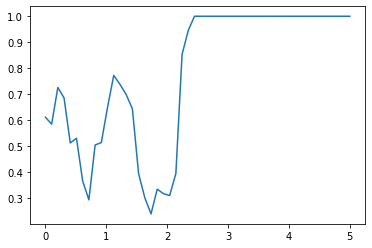

In [12]:
plt.plot(input, total_gbc_model)
plt.show()